## Implementation on Random dataset

In [445]:
import numpy as np
import pandas as pd
from scipy.stats import mode
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split


***Dataframe***

In [446]:
samples = 1000
num_features = 2
features = np.random.rand(samples, num_features)
classes = np.random.choice([ 0, 1], size=samples)


***Split the data into training and testing sets***


In [447]:
X_train, X_test, y_train, y_test = train_test_split(features, classes, test_size=0.2, random_state=42)

***Decision Tree***

In [462]:
def decision_tree(X_train, X_test, y_train, y_test):
    decision = DecisionTreeClassifier(random_state=42)
    decision.fit(X_train, y_train)
    pred = decision.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print("Decision Accuracy:", accuracy)
    return accuracy, decision

def tree_region(X_test, y_test, decision):
    plot_decision_regions(X_test, y_test, clf=decision, legend=2)
    plt.show()


In [464]:
acc, dt1 = decision_tree(X_train, X_test, y_train, y_test)


Decision Accuracy: 0.91


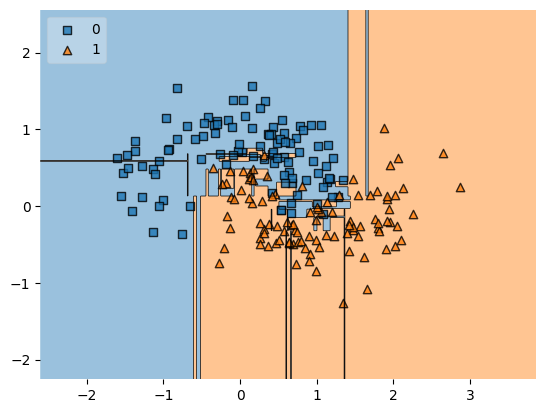

In [465]:
tree_region(X_test, y_test, dt1)

***Bagging ensemble***

In [474]:
def bagging(num_of_decisiontree, X_train, X_test, y_train, y_test):
    decision_trees = []
    for _ in range(num_of_decisiontree):
        index = np.random.choice(len(X_train), len(X_train), replace=True)
        X_sample = X_train[index]
        y_sample = y_train[index]

        dt = DecisionTreeClassifier(random_state=42)
        dt.fit(X_sample, y_sample)
        decision_trees.append(dt)

    predictions = []
    for tree in decision_trees:
        prediction = tree.predict(X_test)
        predictions.append(prediction)

    final_pred = mode(predictions, axis=0)[0]
    accuracy = accuracy_score(y_test, final_pred)
    print("Bagging Accuracy:", accuracy)
    plot_decision_regions(X=X_test, y=y_test, clf=dt, legend=2)
    plt.show()
    return accuracy,decision_trees

***Predict***

Bagging Accuracy: 0.91


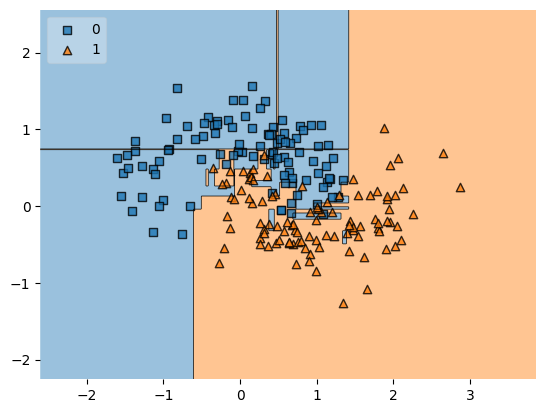

In [475]:
acc1,decision_tree=bagging(10,X_train,X_test,y_train,y_test)


## Random forest

In [453]:
def random_forest(X_train, X_test, y_train, y_test, n_estimators=100):
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Random Forest Accuracy:", accuracy)
    return accuracy



In [454]:
rf_acc = random_forest(X_train, X_test, y_train, y_test, n_estimators=100)

Random Forest Accuracy: 0.465


## Implementation on make_moon dataset

In [466]:
from sklearn.datasets import make_moons, make_classification
X, y = make_moons(n_samples=1000, noise=0.3 , random_state=42 )

Text(0, 0.5, 'Feature 2')

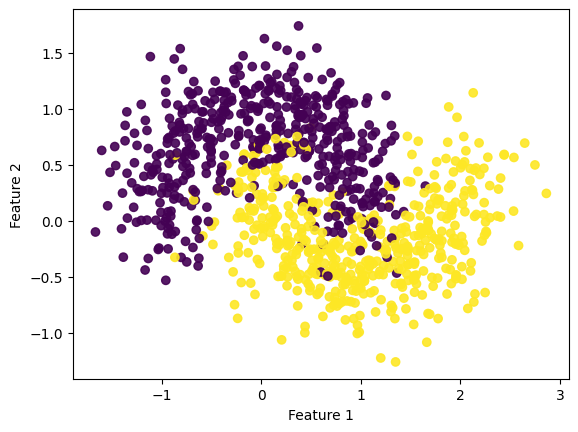

In [467]:
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.9, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [469]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [470]:
def plot_train_test_data(X_train, X_test, y_train):
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=150, alpha=0.4, cmap='viridis', label='Training data')
    plt.scatter(X_test[:, 0], X_test[:, 1], c='red', s=20, alpha=1.0, label='Test Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

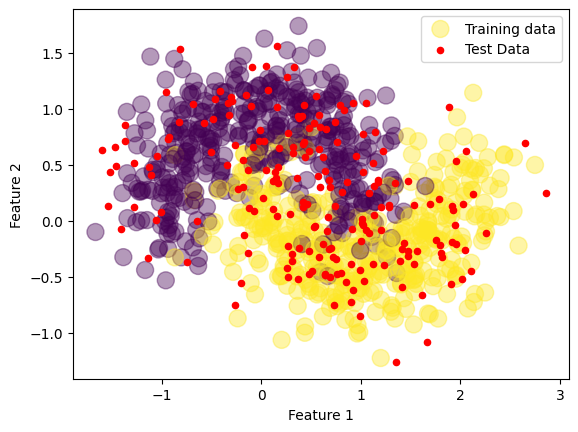

In [471]:
plot_train_test_data(X_train, X_test, y_train)


In [472]:
acc2, dt2 = decision_tree(X_train, X_test, y_train, y_test)


Decision Accuracy: 0.91


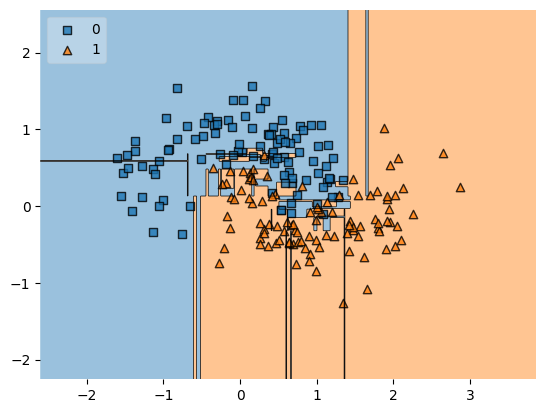

In [473]:
tree_region(X_test,y_test,dt2)

[Help: github](https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/)

[Help : Stackoverflow](https://stackoverflow.com/questions/50538626/plot-the-decision-surface-of-a-classification-decision-tree-with-3-features-on-a)

In [ ]:
# x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
# y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
# Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis');

Plot  indivisual decision tree of bagging

Bagging Accuracy: 0.915


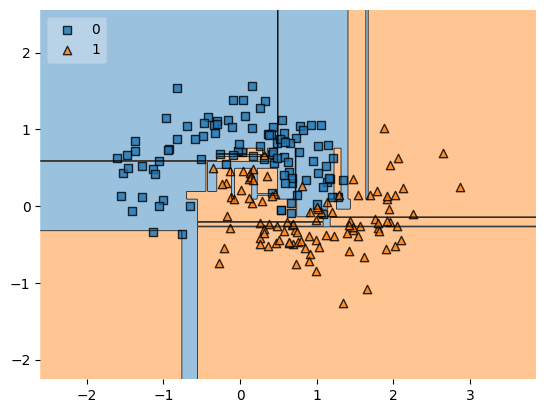

In [476]:
acc3,dt3=bagging(10,X_train,X_test,y_train,y_test)

In [ ]:
def plot_decision_trees(decision_trees):
    plt.figure(figsize=(15, 10))
    for i, tree in enumerate(decision_trees):
        plt.subplot(2, 5, i+1)
        plot_tree(tree, filled=True, feature_names=['F1', 'F2'], class_names=['C0', 'C1'])
        plt.title('DT {}'.format(i+1))


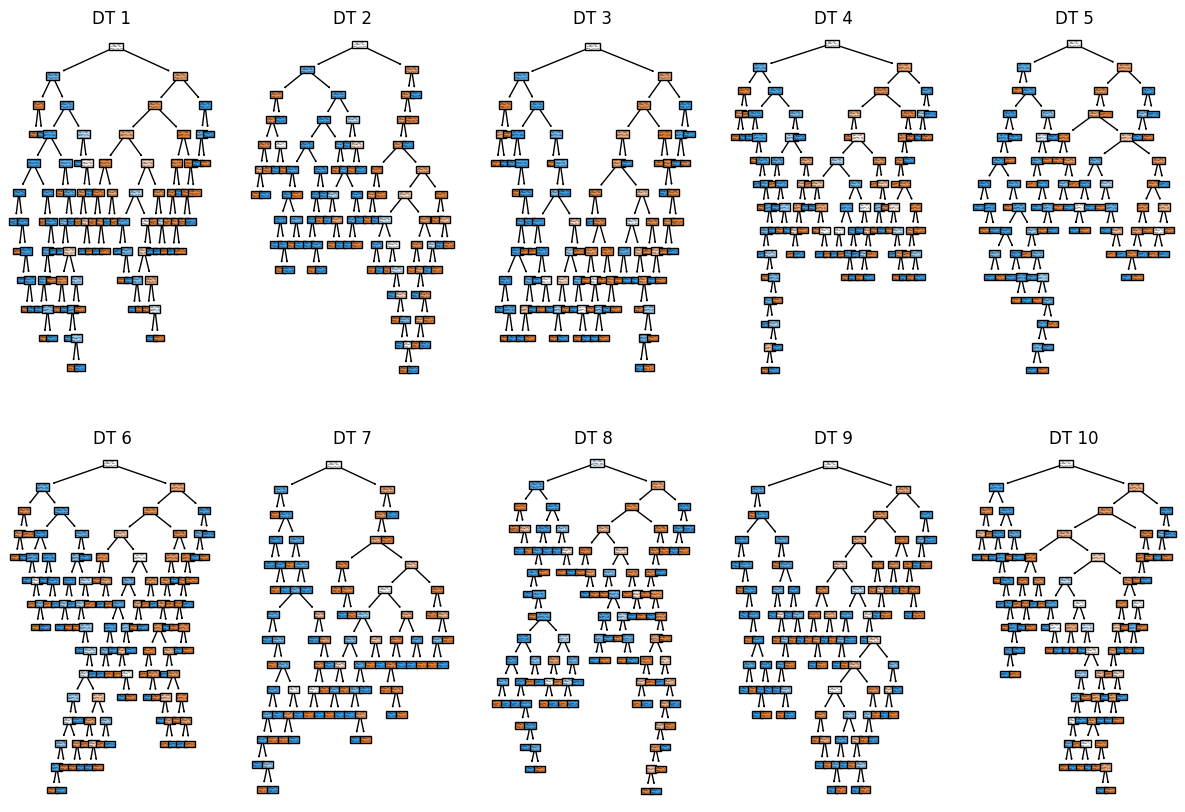

In [ ]:
plot_decision_trees(dt3)

Visualize the decision surface of each decision tree of bagging

In [477]:
def plot_decision_regions_trees(X_test, y_test, decision_trees):
    plt.figure(figsize=(15, 10))
    for i, tree in enumerate(decision_trees):
        plt.subplot(2, 5, i+1)
        plot_decision_regions(X=X_test, y=y_test, clf=tree, legend=2)
        plt.title('Decision Tree {}'.format(i+1))
    plt.show()

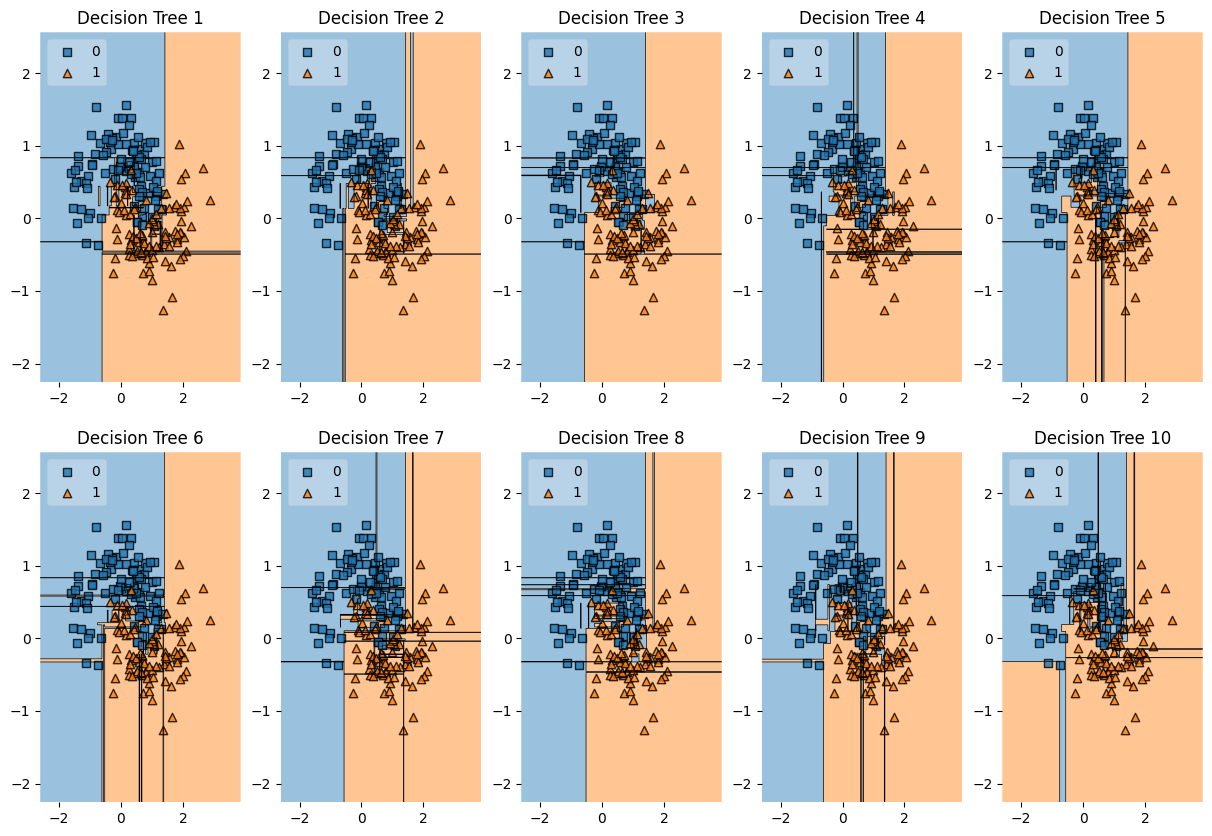

In [478]:
plot_decision_regions_trees(X_test, y_test, dt3)


## Implementation on make_classification dataset

In [479]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100,        
    n_features=4,        #any
    n_informative=3,      
    n_redundant=0,        # derived from informative f..
    n_classes=3,          # any
    flip_y=0.1,          # noise level
    random_state=42       
)


/home/rishabh.mondal/miniconda3/envs/torch_gpu/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


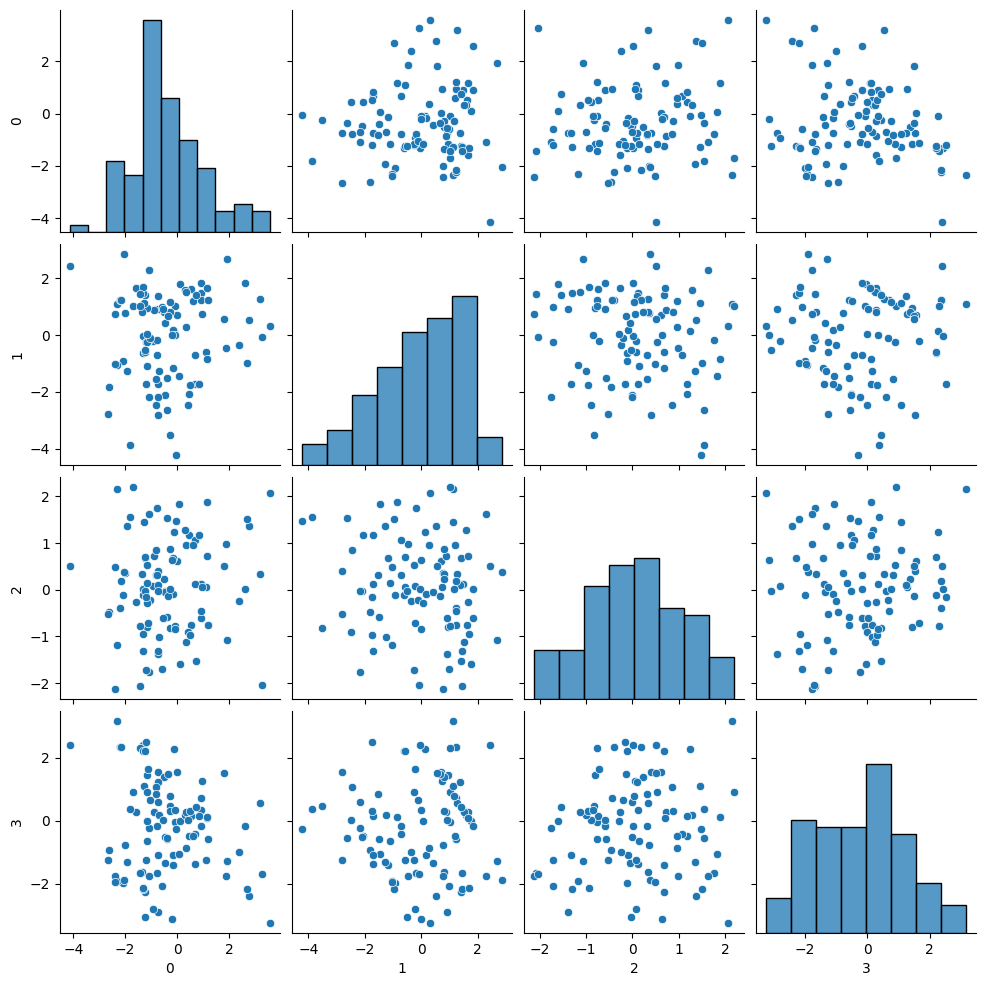

In [ ]:
import seaborn as sns
df = pd.DataFrame(X)
sns.pairplot(df);

In [480]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

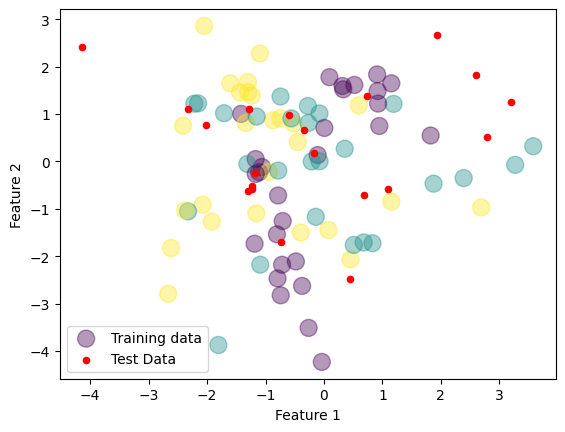

In [481]:
plot_train_test_data(X_train,X_test,y_train)


In [483]:
acc4,dt4 = decision_tree(X_train,X_test,y_train,y_test)

TypeError: 'list' object is not callable

In [ ]:
num_of_decisiontree = 10
decision_trees = []

for _ in range(num_of_decisiontree):
    index = np.random.choice(len(X_train), len(X_train), replace=True)
    X_sample = X_train[index]
    y_sample = y_train[index]
    
    decision_tree = DecisionTreeClassifier(random_state=42)
    decision_tree.fit(X_sample, y_sample)
    decision_trees.append(decision_tree)
    
predictions = []
for tree in decision_trees:
    prediction = tree.predict(X_test)
    predictions.append(prediction)
final_pred = mode(predictions, axis=0)[0]

accuracy = accuracy_score(y_test, final_pred)
print("Bagging Accuracy:", accuracy)

Bagging Accuracy: 0.8


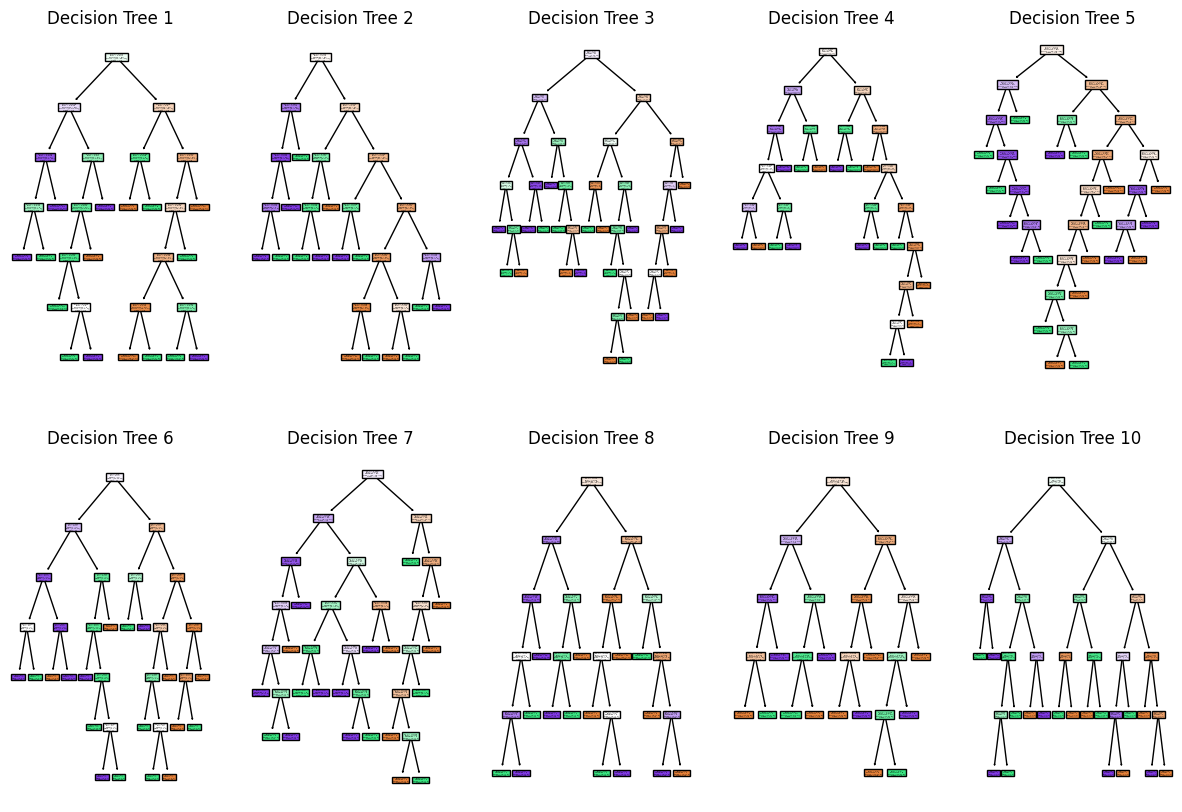

In [ ]:
plt.figure(figsize=(15, 10))
for i, tree in enumerate(decision_trees):
    plt.subplot(2, 5, i+1)
    plot_tree(tree, filled=True, feature_names=['F0', 'F1','F2','F3','F4'], class_names=['C0', 'C1','C2','C3'])
    plt.title('Decision Tree {}'.format(i+1))
plt.show()

** unable to plot decision surface for more than two features** : please give reference


## Random forest 

In [ ]:
rf = RandomForestClassifier(n_estimators=25, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)


Random Forest Accuracy: 0.75


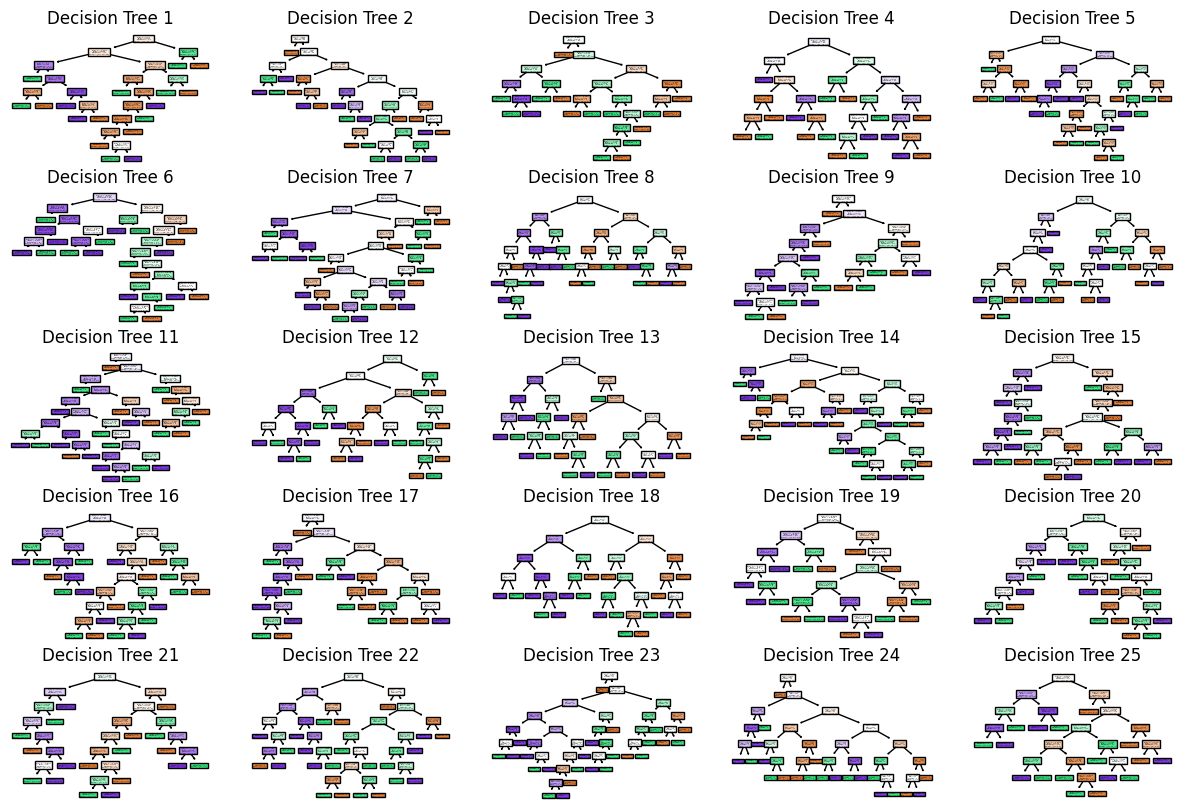

In [ ]:
plt.figure(figsize=(15, 10))
for i, tree in enumerate(rf.estimators_):
    plt.subplot(5, 5, i + 1) 
    plot_tree(tree, filled=True)
    plt.title('Decision Tree {}'.format(i + 1))
plt.show()

## Gradient Decent

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(X.shape, y.shape)


(1000, 2) (1000,)


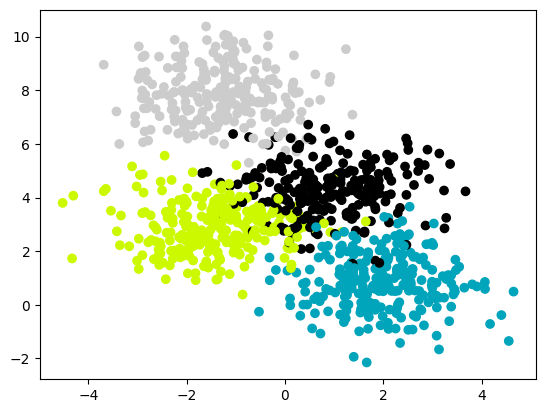

In [ ]:

plt.scatter(X[:,0], X[:,1], c=y, cmap='nipy_spectral')
plt.show()

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y.shape)

(800, 2) (200, 2) (1000,)


In [ ]:
import torch
X_train, y_train, X_test, y_test = map(torch.tensor, (X_train, Y_train, X_test,y_test ))


In [ ]:
print(X_train.shape, Y_train.shape)

     

torch.Size([800, 2]) (800,)


In [ ]:
a = torch.rand([2, 4])
print(a)
print(a.exp())
print(a.exp().sum())
print(a.exp().sum(0))
print(a.exp().sum(-1))
print(a.exp().sum(-1).unsqueeze(-1))

tensor([[0.7405, 0.2869, 0.8941, 0.3707],
        [0.0661, 0.3714, 0.8638, 0.5354]])
tensor([[2.0970, 1.3323, 2.4451, 1.4487],
        [1.0684, 1.4498, 2.3721, 1.7082]])
tensor(13.9216)
tensor([3.1653, 2.7821, 4.8172, 3.1569])
tensor([7.3231, 6.5985])
tensor([[7.3231],
        [6.5985]])


In [ ]:

def model(x):
  a1 = torch.matmul(x, weights1) + bias1 # (N, 2) x (2, 2) -> (N, 2)
  h1 = a1.sigmoid() # (N, 2)
  a2 = torch.matmul(h1, weights2) + bias2 # (N, 2) x (2, 4) -> (N, 4)
  h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1) # (N, 4)
  return h2

In [ ]:
import math
weights1 = torch.randn(2, 2) 
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2, 4) 
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

In [ ]:
y = torch.tensor([1, 0])
y_hat = torch.tensor([[0.1, 0.2, 0.3, 0.4], [0.8, 0.1, 0.05, 0.05]])

def loss_fn(y_hat, y):
  return -(y_hat[range(y.shape[0]), y].log()).mean()

In [ ]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1)
  return (pred == y).float().mean()

In [ ]:
learning_rate = 0.2
epochs = 10000

loss_arr = []
acc_arr = []
X_train = X_train.float()
Y_train = Y_train.long()

for epoch in range(epochs):
  y_hat = model(X_train)
  loss = loss_fn(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()


AttributeError: 'numpy.ndarray' object has no attribute 'long'

In [ ]:
plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])